# FOOD RECIPE RECOMMENDATION ENGINE

## Part 1: Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import mean
from src.eda import *

### Load datasets

Our data was scraped from [food.com](https://www.food.com/) and uploaded to Kaggle. There are two datasets: one for [recipes](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv) and one for [user interactions](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_interactions.csv) with the recipes.

#### Recipes

In [2]:
recipes = pd.read_feather("./data/recipes.feather")
recipes.drop(["level_0", "index"], axis=1, inplace=True)
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,Arriba Baked Winter Squash Mexican Style,137739,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7
1,A Bit Different Breakfast Pizza,31490,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6
2,All In The Kitchen Chili,112140,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13
3,Alouette Potatoes,59389,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,[place potatoes in a large pot of lightly salt...,"this is a super easy, great tasting, make ahea...","[spreadable cheese with garlic and herbs, new ...",11
4,Amish Tomato Ketchup For Canning,44061,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"[mix all ingredients& boil for 2 1 / 2 hours ,...",my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8


The `recipes` dataset has 231,637 rows (each corresponding to a unique recipe) and 12 columns. Most columns do not have missing data, with the exception of `description`. The column details are shown below.

In [3]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231636 entries, 0 to 231635
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231636 non-null  int64 
 2   minutes         231636 non-null  int64 
 3   contributor_id  231636 non-null  int64 
 4   submitted       231636 non-null  object
 5   tags            231636 non-null  object
 6   nutrition       231636 non-null  object
 7   n_steps         231636 non-null  int64 
 8   steps           231636 non-null  object
 9   description     226657 non-null  object
 10  ingredients     231636 non-null  object
 11  n_ingredients   231636 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


##### Cooking time (`minutes`)

The minimum cooking time is 0 minutes, while the maximum cooking time is over 4,000 years! We will leave these numbers as they are, since it may be hard to infer the correct values. However, we will explore what this data looks like when we exclude outliers.

In [4]:
print("Minimum cooking time: {}".format(min(recipes["minutes"])))
print("Maximum cooking time: {}".format(max(recipes["minutes"])))

Minimum cooking time: 0
Maximum cooking time: 2147483647


Cooking time is very right-skewed when we include outliers. After removing outliers using the interquartile range (IQR) method, we see that the majority of dishes can be cooked in under 60 minutes. Without outliers, the distribution still has a tail on the right. This makes sense: while most dishes can be prepared in under an hour, there is the occasional dish that requires a lot more time.

In [5]:
minutes_outliers_removed = remove_outliers(recipes["minutes"]) # Remove outliers for plotting

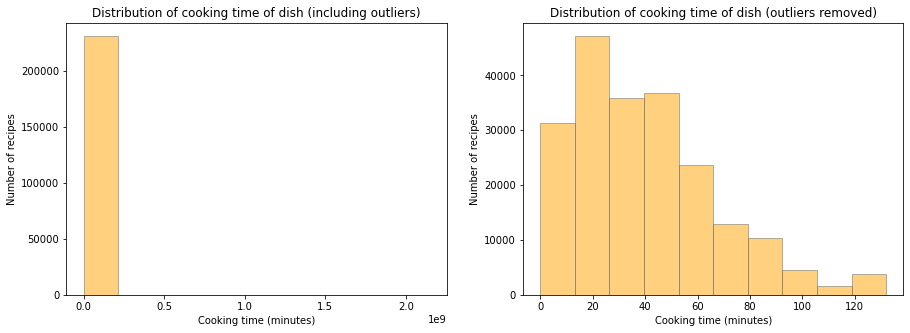

In [6]:
xlab = "Cooking time (minutes)"
name = "cooking time of dish"
plot_hist_outliers(recipes["minutes"], minutes_outliers_removed, xlab, name)

##### Recipe contributors (`contributor_id`)

There are nearly 10 times as many recipes as there are contributors, meaning that the same contributors are providing multiple recipes.

In [7]:
print("Number of contributors: {}".format(recipes["contributor_id"].nunique()))

Number of contributors: 27926


##### Submission date (`submitted`)

This dataset holds recipes submitted over a period of almost 20 years, starting in 1999 and ending in 2018.

In [8]:
print("Earliest recipe submission: {}".format(min(recipes["submitted"])))
print("Earliest recipe submission: {}".format(max(recipes["submitted"])))

Earliest recipe submission: 1999-08-06
Earliest recipe submission: 2018-12-04


##### Nutrition (`nutrition`)

Calorie count is very right-skewed when we include outliers. After removing outliers using the interquartile range (IQR) method, we see that the majority of dishes contain 200 - 600 calories. Without outliers, the distribution still has a tail on the right. This makes sense: while most dishes fall into our majority range, there is the occasional dish that is loaded with calories.

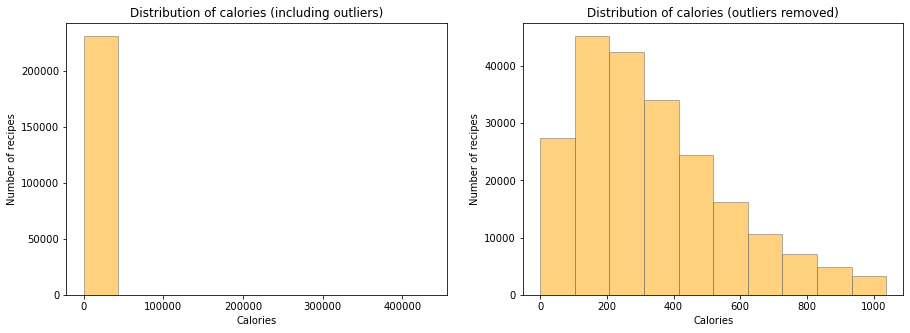

In [9]:
xlab = "Calories"
name = "calories"
calories = [item[0] for item in recipes.nutrition]
calories_outliers_removed = remove_outliers(calories)
plot_hist_outliers(calories, calories_outliers_removed, xlab, name)

##### Steps (`n_steps`) and ingredients (`n_ingredients`)

We see the same trend for `n_steps` and `n_ingredients` as we saw for `minutes` and `nutrition`.

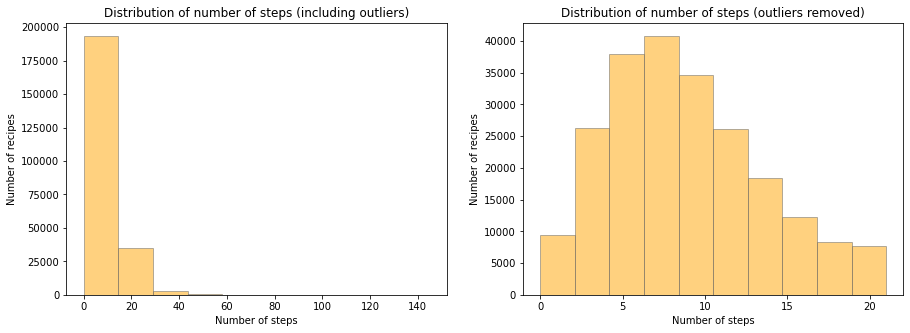

In [10]:
xlab = "Number of steps"
name = "number of steps"
steps_outliers_removed = remove_outliers(recipes["n_steps"])
plot_hist_outliers(recipes["n_steps"], steps_outliers_removed, xlab, name)

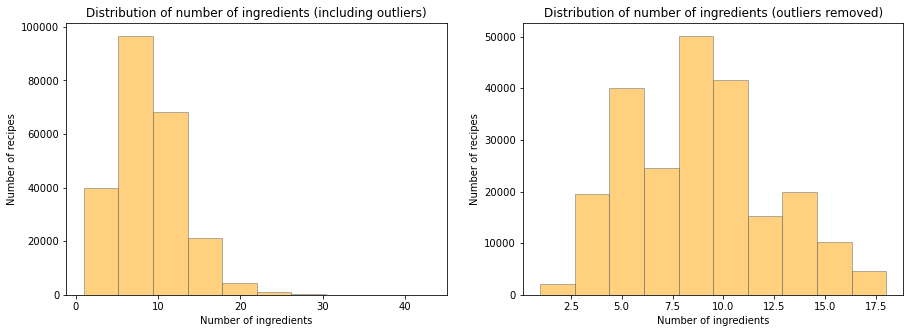

In [11]:
xlab = "Number of ingredients"
name = "number of ingredients"
ingredients_outliers_removed = remove_outliers(recipes["n_ingredients"])
plot_hist_outliers(recipes["n_ingredients"], ingredients_outliers_removed, xlab, name)

#### User interactions

In [12]:
interactions = pd.read_feather("./data/interactions.feather")
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


The `recipes` dataset has 1,132,367 rows and 5 columns. Most columns do not have missing data, with the exception of `review`. The column details are shown below.

In [13]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


##### Users (`user_id`) and recipes (`recipe_id`)

We see that all 231,637 recipes have been used by someone. We have more rows than the number of recipes used, meaning that some recipes have been used more than once. The number of unique users is less than the number of recipes used, indicating that some users have used more than one recipe. This is important information for building our recommendation system.

In [14]:
print("Number of users: {}".format(interactions["user_id"].nunique()))
print("Number of recipes used: {}".format(interactions["recipe_id"].nunique()))

Number of users: 226570
Number of recipes used: 231637


##### Rating (`rating`)

The average user rate approximately 5 recipes, while the average recipe also receives approximately 5 ratings. This is not a lot and will give a very sparse rating matrix, as you will see in memory-based collaborative filtering.

In [15]:
ratings_per_user = interactions.groupby("user_id")["rating"].count()
ratings_per_recipe = interactions.groupby("recipe_id")["rating"].count()
print("Average user gives {} ratings".format(mean(ratings_per_user)))
print("Average recipe receives {} ratings".format(mean(ratings_per_recipe)))

Average user gives 4.997868208500684 ratings
Average recipe receives 4.888541122532238 ratings


The majority of ratings are 4s and 5s.

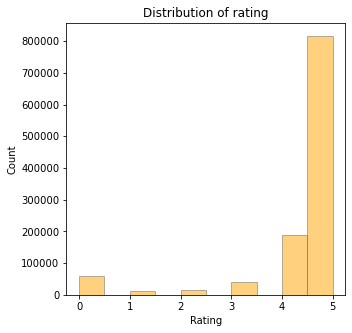

In [16]:
xlab = "Rating"
name = "rating"
plot_hist(interactions["rating"], xlab, name)